In [75]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
import numpy as np

#set inf to 
numericslist = ['level_0','index','IndustryId','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011','2012', '2013','2014','2015','2016','Dollar_Growth','Percentage_Growth']
yearslist = '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011','2012', '2013','2014','2015','2016'


### Store CSV into DataFrame

In [76]:
#define first source of data
csv_file = "Resources/GDP_Huge_Master2.csv"
#convert to df
metroGDPdata_df = pd.read_csv(csv_file, encoding='utf-8')
#replace non-numeric values with 0
metroGDPdata_df = metroGDPdata_df.replace(to_replace={'(D)': 0, '(L)': 0, '(NaN)':0})
metroGDPdata_df.fillna(value=0.0)

C:\Users\micha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GeoFIPS,GeoName,Region,ComponentId,ComponentName,IndustryId,IndustryClassification,Sector,Description,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,1,…,0.0,All industry total,9549104,...,13054952,13229897,12956728,13418482,13882335,14481568,14963370,15621759,16280446,16802781
1,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,2,...,0.0,Private industries,8379519,...,11450487,11552249,11229026,11633016,12073380,12649538,13108020,13717912,14317489,14793461
2,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,3,11,1.0,"Agriculture, forestry, fishing, and hunting",53672,...,74544,75104,70163,80025,93065,88881,103573,96985,85660,78223
3,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,4,111-112,0.0,Farms,40038,...,56385,57076,52252,60446,73107,66725,81026,73202,60724,(NA)
4,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,5,113-115,0.0,"Forestry, fishing, and related activities",13634,...,18160,18027,17911,19579,19959,22157,22547,23783,24935,(NA)
5,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,6,21,1.0,"Mining, quarrying, and oil and gas extraction",93497,...,237231,304781,210566,236802,286115,298500,334897,359348,239208,193145
6,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,7,211,0.0,Oil and gas extraction,66065,...,174506,236921,154274,173088,209027,222644,260842,280061,171100,(NA)
7,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,8,212,0.0,Mining (except oil and gas),13059,...,28077,28450,29081,34092,39330,35951,33547,33700,31609,(NA)
8,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,9,213,0.0,Support activities for mining,14373,...,34648,39411,27211,29623,37759,39905,40507,45587,36499,(NA)
9,998,United States (Metropolitan Portion),0,200,Gross domestic product (GDP) by metropolitan a...,10,22,0.0,Utilities,156016,...,198786,200584,210494,223712,228347,219818,224435,236355,237635,240544


### Create new data with select columns

In [77]:
edited_metroGDPdata_df = metroGDPdata_df[['GeoName','IndustryId','Description','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011','2012', '2013','2014','2015','2016']].copy()

edited_metroGDPdata_df

,GeoName,IndustryId,Description,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,United States (Metropolitan Portion),1,All industry total,9549104,9870324,10344533,11031055,11790834,12485329,13054952,13229897,12956728,13418482,13882335,14481568,14963370,15621759,16280446,16802781
1,United States (Metropolitan Portion),2,Private industries,8379519,8630504,9035641,9647766,10339935,10963791,11450487,11552249,11229026,11633016,12073380,12649538,13108020,13717912,14317489,14793461
2,United States (Metropolitan Portion),3,"Agriculture, forestry, fishing, and hunting",53672,52548,60496,73155,67155,69507,74544,75104,70163,80025,93065,88881,103573,96985,85660,78223
3,United States (Metropolitan Portion),4,Farms,40038,38877,46111,58314,52251,51217,56385,57076,52252,60446,73107,66725,81026,73202,60724,(NA)
4,United States (Metropolitan Portion),5,"Forestry, fishing, and related activities",13634,13670,14384,14841,14904,18289,18160,18027,17911,19579,19959,22157,22547,23783,24935,(NA)
5,United States (Metropolitan Portion),6,"Mining, quarrying, and oil and gas extraction",93497,83099,106151,128649,174850,207584,237231,304781,210566,236802,286115,298500,334897,359348,239208,193145
6,United States (Metropolitan Portion),7,Oil and gas extraction,66065,59051,80238,97667,134273,152595,174506,236921,154274,173088,209027,222644,260842,280061,171100,(NA)
7,United States (Metropolitan Portion),8,Mining (except oil and gas),13059,13066,13948,17083,21632,25417,28077,28450,29081,34092,39330,35951,33547,33700,31609,(NA)
8,United States (Metropolitan Portion),9,Support activities for mining,14373,10982,11966,13899,18945,29572,34648,39411,27211,29623,37759,39905,40507,45587,36499,(NA)
9,United States (Metropolitan Portion),10,Utilities,156016,152787,157536,171108,170177,194985,198786,200584,210494,223712,228347,219818,224435,236355,237635,240544


In [78]:
#Looked at the govt census bureau documentation, figured out that the govt. breaks down the economy into 3 major sectors, GO TO ACS PPTs

metroGDPdatabysector_df = edited_metroGDPdata_df.loc[edited_metroGDPdata_df['IndustryId'].isin(['82','89','90'])]
# metroGDPdatabysector_df = metroGDPdatabysector_df.groupby('GeoName').filter(lambda x : len(x)==3)
# metroGDPdatabysector_df.groupby('GeoName')
#Calculated GDP Change by cols (3 sectors separated already)
metroGDPdatabysector_df['Dollar_Growth'] = metroGDPdatabysector_df['2016'].astype('f4') - metroGDPdatabysector_df['2001'].astype('f4')
metroGDPdatabysector_df['Percentage_Growth']  = (metroGDPdatabysector_df['Dollar_Growth'].astype('f4') / metroGDPdatabysector_df['2001'].astype('f4') * 100)
#reset index in preparation for SQL
metroGDPdatabysector_df1 = metroGDPdatabysector_df
metroGDPdatabysector_df1.reset_index(drop=False,inplace=True)
metroGDPdatabysector_df1.reset_index(drop=False,inplace=True)
metroGDPdatabysector_df1
# LEFT EXTRA INDEX THERE IN C

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,level_0,index,GeoName,IndustryId,Description,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,Dollar_Growth,Percentage_Growth
0,0,32790,"Winston-Salem, NC (Metropolitan Statistical Area)",82,Government and government enterprises,1428,1471,1541,1611,1687,...,2120,2191,2164,2118,2131,2189,2245,2299,871.000000,60.994400
1,1,32797,"Winston-Salem, NC (Metropolitan Statistical Area)",89,Private goods-producing industries,8416,7475,8024,8311,8346,...,0,7059,6661,5892,6236,6711,7303,7145,-1271.000000,-15.102187
2,2,32798,"Winston-Salem, NC (Metropolitan Statistical Area)",90,Private services-providing industries,11380,12181,12617,13546,13657,...,0,15687,15683,16346,16763,18319,19190,19302,7922.000000,69.613358
3,3,32877,"Worcester, MA-CT (Metropolitan Statistical Area)",82,Government and government enterprises,3572,3761,3874,4064,4224,...,5219,5339,5733,5506,5619,5740,5890,5919,2347.000000,65.705482
4,4,32884,"Worcester, MA-CT (Metropolitan Statistical Area)",89,Private goods-producing industries,0,6368,7067,7027,7003,...,6936,0,7415,7993,8118,8349,0,9337,9337.000000,inf
5,5,32885,"Worcester, MA-CT (Metropolitan Statistical Area)",90,Private services-providing industries,0,17501,18420,18711,19520,...,20406,0,22477,23028,23673,24088,0,27031,27031.000000,inf
6,6,32964,"Yakima, WA (Metropolitan Statistical Area)",82,Government and government enterprises,848,883,934,978,1050,...,1290,1307,1307,1353,1350,1388,1414,1472,624.000000,73.584908
7,7,32971,"Yakima, WA (Metropolitan Statistical Area)",89,Private goods-producing industries,1536,1589,1735,1923,1997,...,2156,2361,2782,2877,2831,3005,2840,2825,1289.000000,83.919266
8,8,32972,"Yakima, WA (Metropolitan Statistical Area)",90,Private services-providing industries,2720,2900,3069,3157,3250,...,4143,4457,4588,4536,4555,4635,4780,4919,2199.000000,80.845589
9,9,33051,"York-Hanover, PA (Metropolitan Statistical Area)",82,Government and government enterprises,1064,1128,1218,1353,1474,...,1897,1982,1955,1918,1934,1940,1997,2012,948.000000,89.097748


In [79]:
metroGDPdatabysector_df2 = metroGDPdatabysector_df1
#Removed Nas
metroGDPdatabysector_df2=metroGDPdatabysector_df2.fillna('0')
metroGDPdatabysector_df2=metroGDPdatabysector_df2.fillna(0)

# metroGDPdatabysector_df2.astype(dtype=int, copy=False,errors='raise')
# metroGDPdatabysector_df1.Percentage_Growth= metroGDPdatabysector_df1.Percentage_Growth.astype(int)
# metroGDPdatabysector_df1.Dollar_Growth = metroGDPdatabysector_df1.Dollar_Growth.astype(int)
metroGDPdatabysector_df2[numericslist].astype(dtype=float, copy=False,errors='raise')
econ_numerics_df = metroGDPdatabysector_df2
x = metroGDPdatabysector_df.convert_objects(convert_numeric=True)
x = x.round(decimals=0)
x

x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna('100')
x[numericslist] = x[numericslist].astype(dtype=int, copy=False, errors='ignore')
x.head()
x_desc = x.describe()
# # # x_desc = x['2001','2002','2003','2004','2005','2005','2006','2007','2008','2009','2010','Dollar_Growth','Percentage_Growth'].describe()
x


C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


,level_0,index,GeoName,IndustryId,Description,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,Dollar_Growth,Percentage_Growth
0,0,32790,"Winston-Salem, NC (Metropolitan Statistical Area)",82,Government and government enterprises,1428,1471,1541,1611,1687,...,2120,2191,2164,2118,2131,2189,2245,2299,871,61
1,1,32797,"Winston-Salem, NC (Metropolitan Statistical Area)",89,Private goods-producing industries,8416,7475,8024,8311,8346,...,0,7059,6661,5892,6236,6711,7303,7145,-1271,-15
2,2,32798,"Winston-Salem, NC (Metropolitan Statistical Area)",90,Private services-providing industries,11380,12181,12617,13546,13657,...,0,15687,15683,16346,16763,18319,19190,19302,7922,70
3,3,32877,"Worcester, MA-CT (Metropolitan Statistical Area)",82,Government and government enterprises,3572,3761,3874,4064,4224,...,5219,5339,5733,5506,5619,5740,5890,5919,2347,66
4,4,32884,"Worcester, MA-CT (Metropolitan Statistical Area)",89,Private goods-producing industries,0,6368,7067,7027,7003,...,6936,0,7415,7993,8118,8349,0,9337,9337,100
5,5,32885,"Worcester, MA-CT (Metropolitan Statistical Area)",90,Private services-providing industries,0,17501,18420,18711,19520,...,20406,0,22477,23028,23673,24088,0,27031,27031,100
6,6,32964,"Yakima, WA (Metropolitan Statistical Area)",82,Government and government enterprises,848,883,934,978,1050,...,1290,1307,1307,1353,1350,1388,1414,1472,624,74
7,7,32971,"Yakima, WA (Metropolitan Statistical Area)",89,Private goods-producing industries,1536,1589,1735,1923,1997,...,2156,2361,2782,2877,2831,3005,2840,2825,1289,84
8,8,32972,"Yakima, WA (Metropolitan Statistical Area)",90,Private services-providing industries,2720,2900,3069,3157,3250,...,4143,4457,4588,4536,4555,4635,4780,4919,2199,81
9,9,33051,"York-Hanover, PA (Metropolitan Statistical Area)",82,Government and government enterprises,1064,1128,1218,1353,1474,...,1897,1982,1955,1918,1934,1940,1997,2012,948,89


In [80]:
# Split into quartiles on 2005 values
    
q = x.fillna(0.0)

q['Quartiles'] = pd.qcut(q['2005'], 5, labels=list(range(5)))
q[['Dollar_Growth','Percentage_Growth']] = q[['Dollar_Growth','Percentage_Growth']].astype(dtype='int64')
q.index.names = ['ID']
q = q.drop(['level_0'], axis=1)
q

,index,GeoName,IndustryId,Description,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Dollar_Growth,Percentage_Growth,Quartiles
ID,,,,,,,,,,,,,,,,,,,,,
0,32790,"Winston-Salem, NC (Metropolitan Statistical Area)",82,Government and government enterprises,1428,1471,1541,1611,1687,1811,...,2191,2164,2118,2131,2189,2245,2299,871,61,3
1,32797,"Winston-Salem, NC (Metropolitan Statistical Area)",89,Private goods-producing industries,8416,7475,8024,8311,8346,8821,...,7059,6661,5892,6236,6711,7303,7145,-1271,-15,4
2,32798,"Winston-Salem, NC (Metropolitan Statistical Area)",90,Private services-providing industries,11380,12181,12617,13546,13657,13737,...,15687,15683,16346,16763,18319,19190,19302,7922,70,4
3,32877,"Worcester, MA-CT (Metropolitan Statistical Area)",82,Government and government enterprises,3572,3761,3874,4064,4224,4413,...,5339,5733,5506,5619,5740,5890,5919,2347,66,4
4,32884,"Worcester, MA-CT (Metropolitan Statistical Area)",89,Private goods-producing industries,0,6368,7067,7027,7003,7679,...,0,7415,7993,8118,8349,0,9337,9337,100,4
5,32885,"Worcester, MA-CT (Metropolitan Statistical Area)",90,Private services-providing industries,0,17501,18420,18711,19520,19806,...,0,22477,23028,23673,24088,0,27031,27031,100,4
6,32964,"Yakima, WA (Metropolitan Statistical Area)",82,Government and government enterprises,848,883,934,978,1050,1114,...,1307,1307,1353,1350,1388,1414,1472,624,74,3
7,32971,"Yakima, WA (Metropolitan Statistical Area)",89,Private goods-producing industries,1536,1589,1735,1923,1997,2037,...,2361,2782,2877,2831,3005,2840,2825,1289,84,3
8,32972,"Yakima, WA (Metropolitan Statistical Area)",90,Private services-providing industries,2720,2900,3069,3157,3250,3393,...,4457,4588,4536,4555,4635,4780,4919,2199,81,3


In [81]:
def q_a_t_t_l(y1,y2):
    q1 = q.loc[(q['Quartiles'] == 1)]
    q2 = q.loc[(q['Quartiles'] == 2)]
    q3 = q.loc[(q['Quartiles'] == 3)]
    q4 = q.loc[(q['Quartiles'] == 4)]

    pgy1 = q.loc[q['IndustryId']==89,f"{y1}"].sum().tolist()
    psy1= q.loc[q['IndustryId']==90,f"{y1}"].sum().tolist()
    gsy1= q.loc[q['IndustryId']==82,f"{y1}"].sum().tolist()
    sumy1 = pgy1 + psy1 +gsy1
    # ost0 = brl.loc[brl['Renewal % Change'] == '0%', 'Account Name'].tolist()
    pgy2 = q.loc[q['IndustryId']==89,f"{y2}"].sum().tolist()
    psy2= q.loc[q['IndustryId']==90,f"{y2}"].sum().tolist()
    gsy2= q.loc[q['IndustryId']==82,f"{y2}"].sum().tolist()
    sumy2 = pgy2 + psy2 +gsy2
    return ([pgy1,psy1,gsy1,sumy1],[pgy2,psy2,gsy2,sumy2])
q_a_t_t_l('2001','2016')

([4256575, 15023341, 3123931, 22403847],
 [5091907, 20460129, 3384861, 28936897])

In [82]:
# ADD ACS POPULATION DATA TO econ_db;
csv_file1 = "PEP_2015_GCTPEPTCOM.US23_with_ann.csv"
#convert to df
md6 = pd.read_csv(csv_file1, encoding='cp1252',usecols=['GC.display-label','popchg4201072015'])
md6.rename(columns={'GC.display-label':'GeoName'}, inplace=True)

md6.rename(columns={'popchg4201072015':'Pop_Change'}, inplace=True)


md6['GeoName'] = md6['GeoName'].str.replace('United States - ', '')
md6['GeoName'] = md6['GeoName'].str.replace(' Metro Area', '')
md6 = md6.reset_index()

md6.rename(columns={'index':'ID'}, inplace=True)
md6.head()

,ID,GeoName,Pop_Change
0,0,United States,12660715
1,1,In metropolitan statistical area,12787721
2,2,"Abilene, TX",4326
3,3,"Akron, OH",1036
4,4,"Albany, GA",-3974


In [83]:
#don't delete, worked in place in last.jpynb
connection_string = "root:password@localhost/econ_db"
engine = create_engine(f'mysql://{connection_string}')
q.to_sql(name='allmetrogdp', con=engine, if_exists='replace', index=False)
md6.to_sql(name='pop', con=engine, if_exists='replace', index=False)

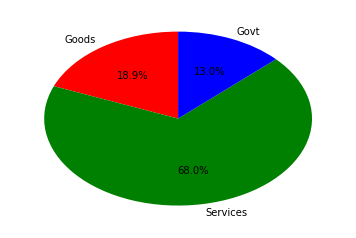

In [84]:
import matplotlib.pyplot as plt

# sum10 = pg10 + ps10 +gs10
slices_hours = [pg05, ps05, gs05]
activities = ['Goods', 'Services','Govt']
colors = ['r', 'g','b']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

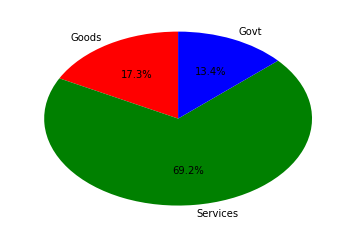

In [85]:
sum10 = pg10 + ps10 +gs10
slices_hours = [pg10, ps10, gs10]
activities = ['Goods', 'Services','Govt']
colors = ['r', 'g','b']
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()


### Store JSON data into a DataFrame

In [86]:
# json_file = "../Resources/customer_location.json"
# customer_location_df = pd.read_json(json_file)
# customer_location_df.head()

### Clean DataFrame

In [87]:
# new_customer_location_df = customer_location_df[["id", "address", "us_state"]].copy()
# new_customer_location_df.head()

### Connect to local database

In [88]:
connection_string = "root:password@localhost/econ_db"
engine = create_engine(f'mysql://{connection_string}')

### Check for tables

In [89]:
engine.table_names()

['allmetrogdp', 'metrogdp', 'pop']

### Use pandas to load json converted DataFrame into database

In [91]:
# new_customer_location_df.to_sql(name='customer_location', con=engine, if_exists='append', index=True, index_label='Geo')

### Confirm data has been added by querying the customer_name table
* NOTE: can also check using pgAdmin

In [94]:
pd.read_sql_query('select * from allmetrogdp', con=engine)

,index,GeoName,IndustryId,Description,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,Dollar_Growth,Percentage_Growth,Quartiles
0,32790,"Winston-Salem, NC (Metropolitan Statistical Area)",82,Government and government enterprises,1428,1471,1541,1611,1687,1811,...,2191,2164,2118,2131,2189,2245,2299,871,61,3
1,32797,"Winston-Salem, NC (Metropolitan Statistical Area)",89,Private goods-producing industries,8416,7475,8024,8311,8346,8821,...,7059,6661,5892,6236,6711,7303,7145,-1271,-15,4
2,32798,"Winston-Salem, NC (Metropolitan Statistical Area)",90,Private services-providing industries,11380,12181,12617,13546,13657,13737,...,15687,15683,16346,16763,18319,19190,19302,7922,70,4
3,32877,"Worcester, MA-CT (Metropolitan Statistical Area)",82,Government and government enterprises,3572,3761,3874,4064,4224,4413,...,5339,5733,5506,5619,5740,5890,5919,2347,66,4
4,32884,"Worcester, MA-CT (Metropolitan Statistical Area)",89,Private goods-producing industries,0,6368,7067,7027,7003,7679,...,0,7415,7993,8118,8349,0,9337,9337,100,4
5,32885,"Worcester, MA-CT (Metropolitan Statistical Area)",90,Private services-providing industries,0,17501,18420,18711,19520,19806,...,0,22477,23028,23673,24088,0,27031,27031,100,4
6,32964,"Yakima, WA (Metropolitan Statistical Area)",82,Government and government enterprises,848,883,934,978,1050,1114,...,1307,1307,1353,1350,1388,1414,1472,624,74,3
7,32971,"Yakima, WA (Metropolitan Statistical Area)",89,Private goods-producing industries,1536,1589,1735,1923,1997,2037,...,2361,2782,2877,2831,3005,2840,2825,1289,84,3
8,32972,"Yakima, WA (Metropolitan Statistical Area)",90,Private services-providing industries,2720,2900,3069,3157,3250,3393,...,4457,4588,4536,4555,4635,4780,4919,2199,81,3
9,33051,"York-Hanover, PA (Metropolitan Statistical Area)",82,Government and government enterprises,1064,1128,1218,1353,1474,1570,...,1982,1955,1918,1934,1940,1997,2012,948,89,3


### Confirm data has been added by querying the customer_location table

,id,address,us_state
0,1,043 Mockingbird Place,Indiana
1,2,4 Prentice Point,Indiana
2,3,46 Derek Junction,Texas
3,4,11966 Old Shore Place,Missouri
4,5,5 Evergreen Circle,New York


In [31]:

x1 = []
x2 = []
x3 = []
x4 = []

l=len(q.GeoName)
# mean = 23 #total % gdp growth for the USA
# def
i=1
for i in q.iloc[i:l-1,12]:
    
    idx1 = i
    idx2 = (i+1)
    idx3 = (i+2)   
    idx4 = (i+3)
    row1,row2, row3, row4=q.iloc[idx1],q.iloc[idx2],q.iloc[idx3],q.iloc[idx4] 
    x1.append(row1['2001'])
    x2.append(row2['2001'])                             
    x3.append(row3['2001'])
    x4.append(row4['2001'])
    a = row1['2001']
    b = row2['2001']
    c = row3['2001']
    d =row3['2001']
    
    i += 4
print(len(x1),len(x2),len(x3),len(x4))
     
y1 = []
y2 = []
y3 = []
y4 = []

l=len(x.GeoName)
# mean = 23 #total % gdp growth for the USA
j=1
for j in q.iloc[j:l-1,12]:
    
    jdy1 = j
    jdy2 = (j+1)
    jdy3 = (j+2)   
    jdy4 = (j+3)
    row1,row2, row3, row4=q.iloc[jdy1],q.iloc[jdy2],q.iloc[jdy3],q.iloc[jdy4] 
    y1.append(row1['2010'])
    y2.append(row2['2010'])                             
    y3.append(row3['2010'])
    y4.append(row4['2010'])
    a = row1['2010']
    b = row2['2010']
    c = row3['2010']
    d = row4['2010']
    
    j += 4
print(j)

IndexError: single positional indexer is out-of-bounds